In [1]:
"""
Theoretical metric proven "good articles" of the wikispeedia dataset.

Fletcher Collis, nov 2024
"""

'\nTheoretical metric proven "good articles" of the wikispeedia dataset.\n\nFletcher Collis, nov 2024\n'

In [2]:
#%pip install -r requirements.txt

['/Users/fletchercollis/Desktop/Applied data analysis/Project/ada-2024-project-adaholiks', '/Users/fletchercollis/opt/anaconda3/envs/CS-401_ADA/lib/python311.zip', '/Users/fletchercollis/opt/anaconda3/envs/CS-401_ADA/lib/python3.11', '/Users/fletchercollis/opt/anaconda3/envs/CS-401_ADA/lib/python3.11/lib-dynload', '', '/Users/fletchercollis/opt/anaconda3/envs/CS-401_ADA/lib/python3.11/site-packages', '/Users/fletchercollis/Desktop/Applied data analysis/Project', '/Users/fletchercollis/Desktop/Applied data analysis/Project']
---- WARNING: The following articles have a problem: ----
Badugi has no links (out-edges) listed.
Color_Graphics_Adapter has no links (out-edges) listed.
Directdebit has no category listed.
Directdebit has no links (out-edges) listed.
Donation has no category listed.
Donation has no links (out-edges) listed.
Douglas_DC-4 has no links (out-edges) listed.
Duchenne_muscular_dystrophy has no links (out-edges) listed.
Friend_Directdebit has no category listed.
Klinefelte

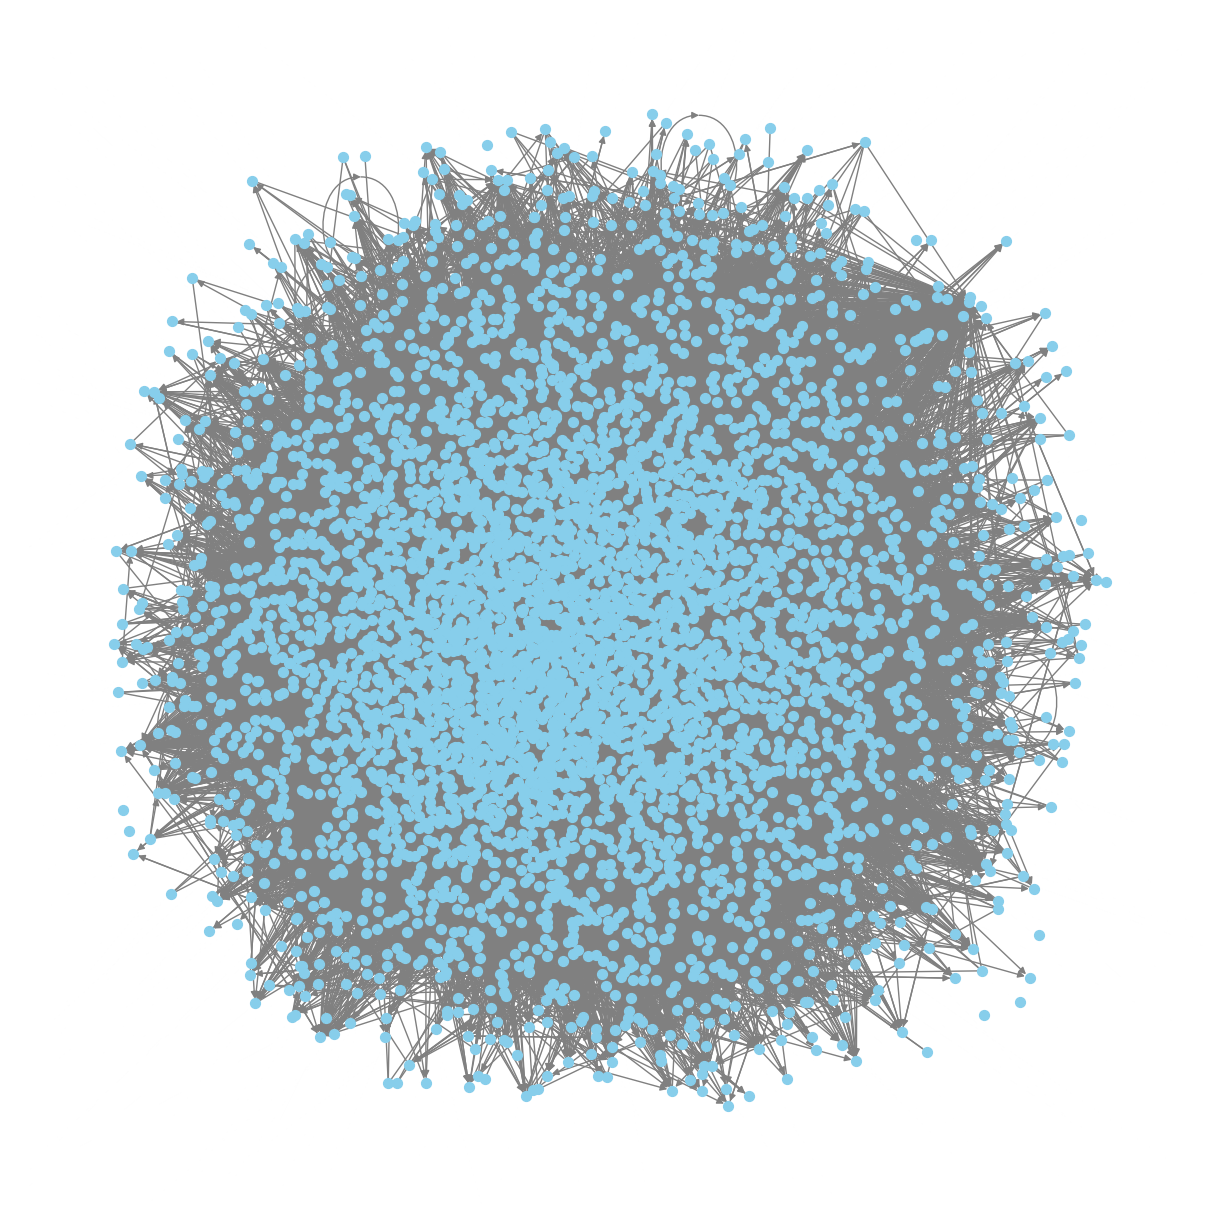

In [3]:
import pandas as pd
from src.load_data import *
from src.graph_data import *

### Checking if there are any impossible paths between two pairs

'''from collections import defaultdict

total_pairs = 0
unconnected_pairs = 0
connected_pairs = [] 

for source in G.nodes():

    for target in G.nodes():

        if source != target:

            total_pairs += 1

            if nx.has_path(G, source, target):

                connected_pairs.append((source, target))

            else:
                
                unconnected_pairs += 1

print(f"Total pairs of nodes: {total_pairs}")
print(f"Number of unconnected pairs: {unconnected_pairs}")'''

## Oscar's code to get all source and target pairs possible in the user dataframe

In [4]:
articles = load_articles_into_df()
categories = load_categories()
links = load_links()
paths_finished = load_paths_finished()
paths_unfinished = load_paths_unfinished()
distances = load_distances()

# Add a "finished" column to paths_finished
paths_finished['finished'] = True
paths_finished['failure_reason'] = None
# Extract the start_article and target_article from the `path` column
paths_finished['start_article'] = paths_finished['path'].apply(lambda x: x.split(';')[0])
paths_finished['target_article'] = paths_finished['path'].apply(lambda x: x.split(';')[-1])

# Same to paths_unfinished
paths_unfinished['finished'] = False
# Clean the paths_unfinished dataframe
# Rename 'type' to 'failure_reason'
paths_unfinished.rename(columns={'type': 'failure_reason', 'target' : 'target_article'}, inplace=True)
# extract the start_article from the `path` column
paths_unfinished['start_article'] = paths_unfinished['path'].apply(lambda x: x.split(';')[0])

paths = pd.concat([paths_finished, paths_unfinished])

finished_paths = paths[paths['finished'] == True]

unique_pairs = finished_paths[['start_article', 'target_article']].drop_duplicates()

pair_counts = finished_paths.groupby(['start_article', 'target_article']).size().reset_index(name='count')

# Display the pairs along with their counts
pair_counts

,start_article,target_article,count
0,10th_century,11th_century,3
1,10th_century,Banknote,1
2,10th_century,Country,1
3,10th_century,Harlem_Globetrotters,2
4,10th_century,History_of_democracy,1
...,...,...,...
28713,Zulu,Language,1
28714,Zulu,Slovenia,2
28715,Zürich,Billie_Holiday,1
28716,Zürich,Mediterranean_Sea,1


#### Here I had an error concerning this article in the later loop that counts article "goodness"

In [ ]:
for _,row in pair_counts.iterrows():
    if row['start_article'] == 'Wikipedia_Text_of_the_GNU_Free_Documentation_License':
        print('True')

    elif row['target_article'] == 'Wikipedia_Text_of_the_GNU_Free_Documentation_License':

### List of theoretical "good nodes"

Here, for every node, we count the times it is part of a shortest path. By doing this, we obtain a dataframe of nodes with a metric describing whether or not that are often good choices when playing the wikispeedia game.

Here must we divide the count by the number of shortest paths?? We have done this so that we normalize the importance of each article!

In [15]:
# Here beware, it takes very long to run as the operation is computationaly expensive 
from collections import defaultdict

node_counts = defaultdict(int)

errors = 0

lengths = []

for _, row in pair_counts.iterrows():
    source = row['start_article']
    target = row['target_article']

    try:

        all_paths = list(nx.all_shortest_paths(G, source=source, target=target))

        nb_of_shortest_paths = len(all_paths)

        lengths.append(nb_of_shortest_paths)
        
        for path in all_paths:
            for node in path:
                if node != source and node != target:
                    node_counts[node] += 1/nb_of_shortest_paths

    except nx.NetworkXNoPath:
        # Skip this source-target pair if no path exists
        errors +=1


node_counts_df = pd.DataFrame(node_counts.items(), columns=['Node', 'ShortestPathCount'])

node_counts_df


,Node,ShortestPathCount
0,Scotland,238.417147
1,France,417.042087
2,Germany,614.765519
3,Mexico,124.337668
4,Dublin,29.001951
...,...,...
3730,2005_Sumatra_earthquake,0.008197
3731,Black_Wildebeest,0.062500
3732,Great_Spotted_Woodpecker,0.038961
3733,Green_Woodpecker,0.064935


In [20]:
# Sort by the 'ShortestPathCount' column in ascending order
node_counts_df = node_counts_df.sort_values(by='ShortestPathCount', ascending=False)
node_counts_df.head(20)

,Node,ShortestPathCount
27,United_States,2778.997827
124,United_Kingdom,1128.250118
77,Europe,809.943234
79,England,746.721314
174,Africa,716.774062
2,Germany,614.765519
92,World_War_II,534.374375
230,Japan,526.817727
143,Earth,480.186276
1,France,417.042087


In [17]:
errors

1

In [18]:
max(lengths)

599

#### Some Statistics

Some classic measurements

In [21]:
# Descriptive statistics
mean_count = node_counts_df['ShortestPathCount'].mean()
median_count = node_counts_df['ShortestPathCount'].median()
std_dev_count = node_counts_df['ShortestPathCount'].std()
min_count = node_counts_df['ShortestPathCount'].min()
max_count = node_counts_df['ShortestPathCount'].max()

print(f"Mean: {mean_count}, Median: {median_count}, Std Dev: {std_dev_count}")
print(f"Min: {min_count}, Max: {max_count}")

Mean: 13.928781793841997, Median: 2.5138900215525943, Std Dev: 63.76417795495285
Min: 0.003125, Max: 2778.9978273784664


Boxplot

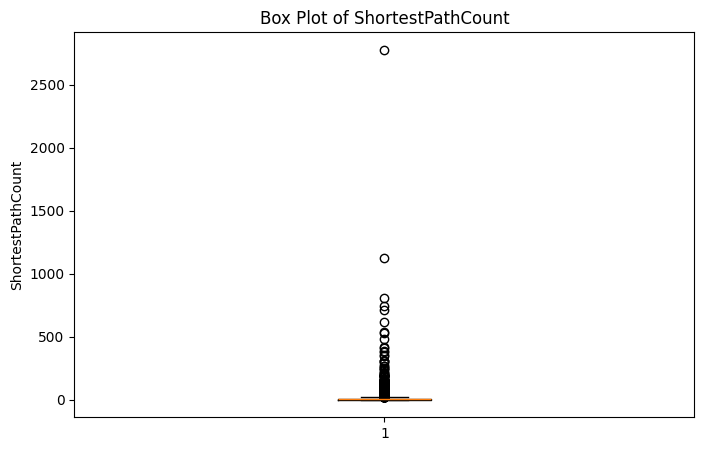

In [22]:
# Box Plot
plt.figure(figsize=(8, 5))
plt.boxplot(node_counts_df['ShortestPathCount'])
plt.title("Box Plot of ShortestPathCount")
plt.ylabel("ShortestPathCount")
plt.show()

Histogram ----> get distribution

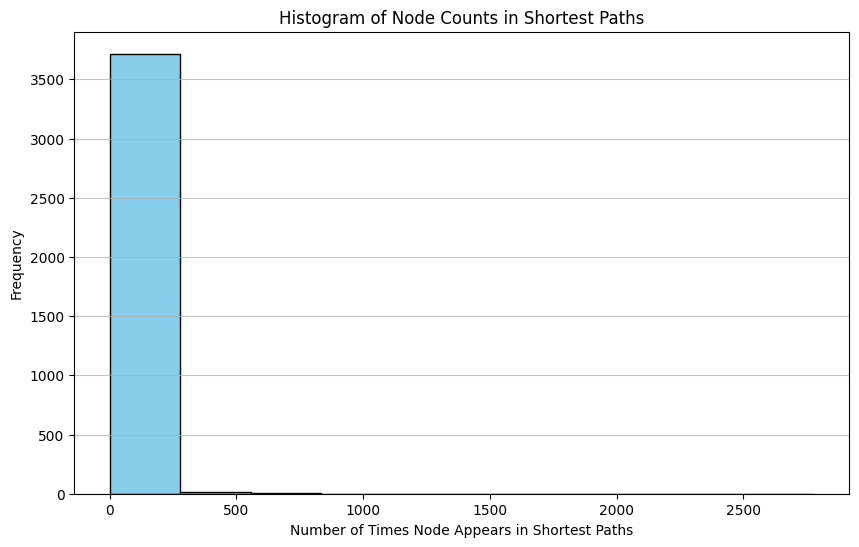

In [23]:
import matplotlib.pyplot as plt

# Plot histogram of 'ShortestPathCount'
plt.figure(figsize=(10, 6))
plt.hist(node_counts_df['ShortestPathCount'], bins=10, color='skyblue', edgecolor='black')
plt.title("Histogram of Node Counts in Shortest Paths")
plt.xlabel("Number of Times Node Appears in Shortest Paths")
plt.ylabel("Frequency")
plt.grid(axis='y', alpha=0.75)
plt.show()

This is a networkx built in function that could be useful?

In [ ]:
# Calculate betweenness centrality
#betweenness_centrality = nx.betweenness_centrality(G)
#node_counts_df['BetweennessCentrality'] = node_counts_df['Node'].map(betweenness_centrality)

# Display comparison
#print(node_counts_df[['Node', 'ShortestPathCount', 'BetweennessCentrality']])